In [40]:
import numpy as np
import pandas as pd


# confusion_matrix = array([
#    [ 45,  29,  18,  14,   5,  23,   3,  18,   0,  16,   3,   2],
#    [ 48, 125,  25,  27,  13,   5,  12,   8,   3,   9,   1,   1],
#    [ 29,  19, 410,  16,   7,   3,   3,   4,   1,  35,   7,   0],
#    [ 11,  18,  14,   2,   2,  10,   2,  17,   1,   5,   2,   3],
#    [  9,  11,   5,   3,   4,   3,   0,  10,   1,   2,   0,   1],
#    [ 18,   9,   6,   5,   0, 120,  16,   0,   0,   0,   0,   0],
#    [  5,  16,   4,   1,   2,  12,   5,   4,   0,   4,   0,   0],
#    [ 28,  27,   4,  26,   5,   1,   1, 185,   1,  18,  22,   3],
#    [  1,   4,   1,   3,   2,   0,   0,   2,   0,   0,   0,   0],
#    [ 22,   6,  18,   7,   8,   0,   3,  20,   0,  97,   6,   1],
#    [  5,   7,   8,  10,   1,   0,   0,  18,   0,   2,  14,   0],
#    [  3,   7,   1,  11,   0,   0,   0,   6,   0,   1,   2,   7]],
# dtype=int64)

train_first = pd.read_pickle("../data/processed/processed_all/train_all_first.pickle")
train_last = pd.read_pickle("../data/processed/processed_all/train_all_last.pickle")

# click_mode is the chosen mode by user out of all suggested tranport modes
click_mode = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [19]:
def plot_count_mode(df):
    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(20,10))
    x = df.click_mode.unique()
    x.sort()
    y = df.groupby('click_mode').count()['sid']
    ax.bar(x, y);
    ax.set_xticklabels(x, fontsize=16);
    ax.set_xticks(x);
    ax.set_yticklabels(range(0,90000,10000), fontsize=16);
    rects = ax.patches

    # Make some labels.
    labels = y

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, '{:.2f}'.format(label),
                ha='center', va='bottom', fontsize=16)

    ax.set_title("Downsampled data", fontsize=16);

In [36]:
# Counts quantity of mode in list
def click_mode_count(df, mode):
    target_count = df.click_mode.value_counts()
    return target_count[mode]

In [41]:
# Example Count each click_mode
for mode in click_mode:
    result = click_mode_count(train_first, mode)
    print(f'Click Mode {mode}:', result)

Click Mode 1: 70369
Click Mode 2: 136491
Click Mode 3: 24626
Click Mode 4: 12606
Click Mode 5: 47480
Click Mode 6: 11863
Click Mode 7: 78209
Click Mode 8: 1857
Click Mode 9: 48864
Click Mode 10: 14882
Click Mode 11: 6089


In [42]:
# Returns excerpt of list by mode 
def divide_mode(df, mode):
    return df[df['click_mode'] == mode]

In [44]:
# Example excerpt of list by click_mode 8
df_modelist = divide_mode(train_first, 8)
df_modelist.click_mode.count()

1857

In [56]:
# Random upsampling to quantity of another click_mode
# .sample() random items of given length; replace missing data with substituted values
# Returns list of upsampled mode 

def up_othermode(df, mode, target_mode):
    new_quantity = click_mode_count(df, target_mode)
    df_modelist = divide_mode(df, mode)
    
    df_mode_target = df_modelist.sample(new_quantity, replace=True)
    df = df.loc[df.click_mode != mode]
    df = pd.concat([df_mode_target, df], axis=0)
    return df

In [68]:
df_upsampled = up_othermode(df, 8, 2)

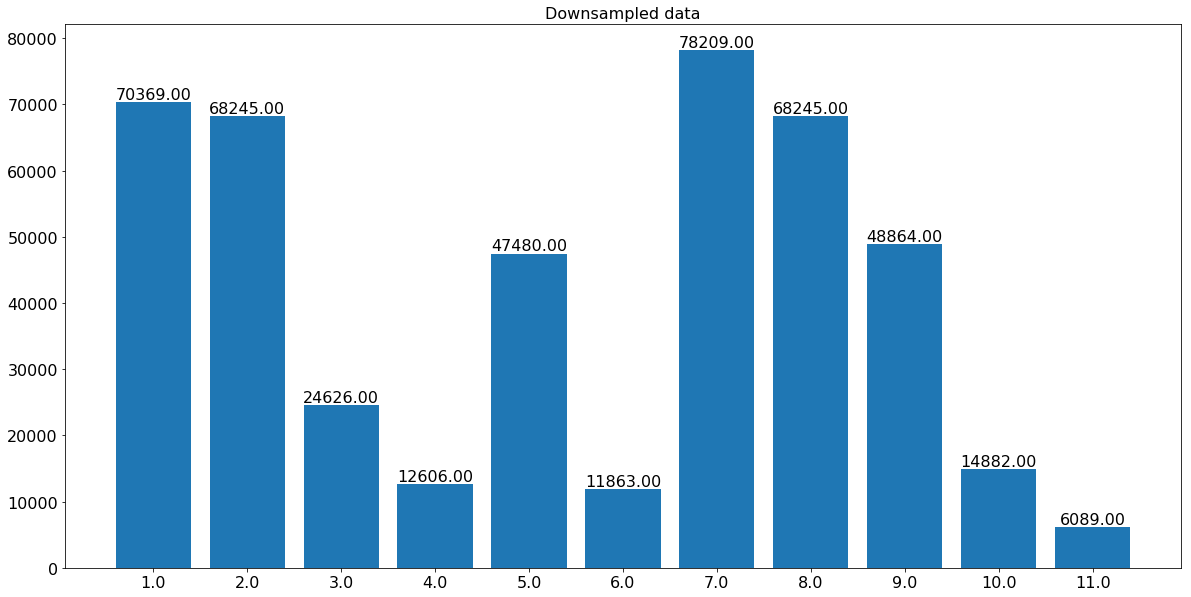

In [69]:
plot_count_mode(df_upsampled)

In [70]:
df_upsampled = up_othermode(df_upsampled, 4, 2)

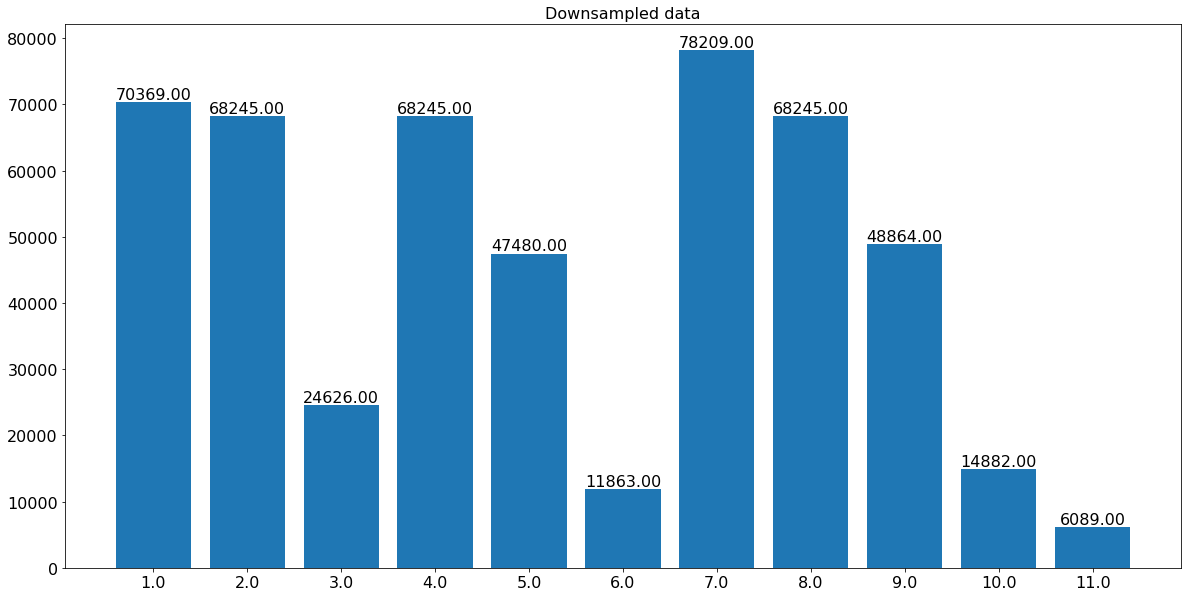

In [71]:
plot_count_mode(df_upsampled)

In [72]:
df_upsampled = up_othermode(df_upsampled, 6, 2)

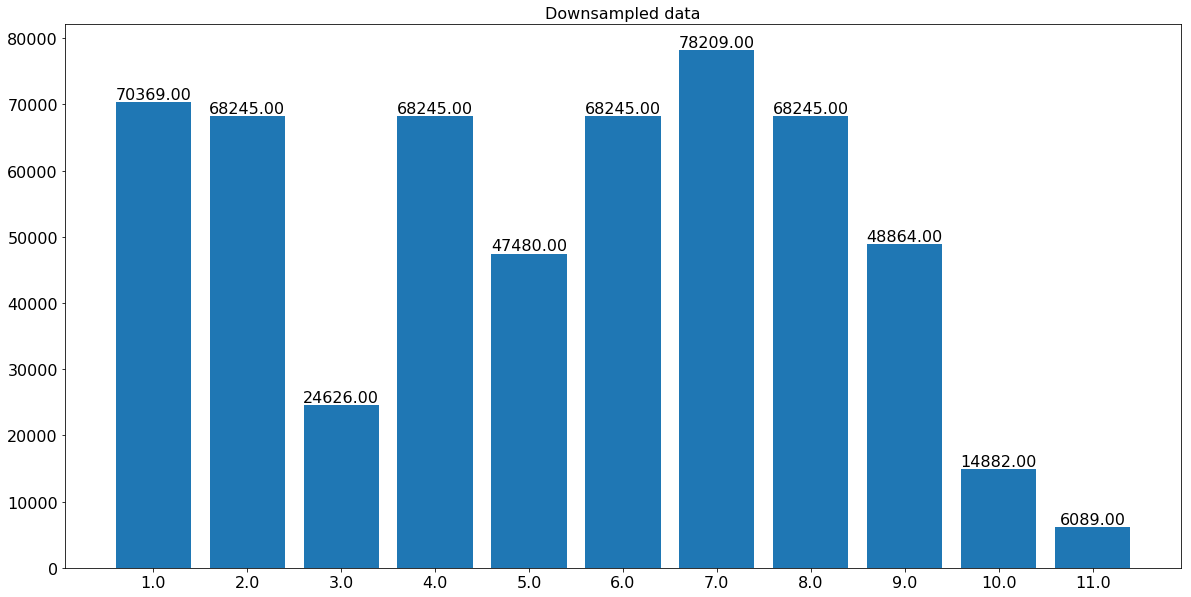

In [73]:
plot_count_mode(df_upsampled)

In [74]:
df_upsampled = up_othermode(df_upsampled, 3, 2)

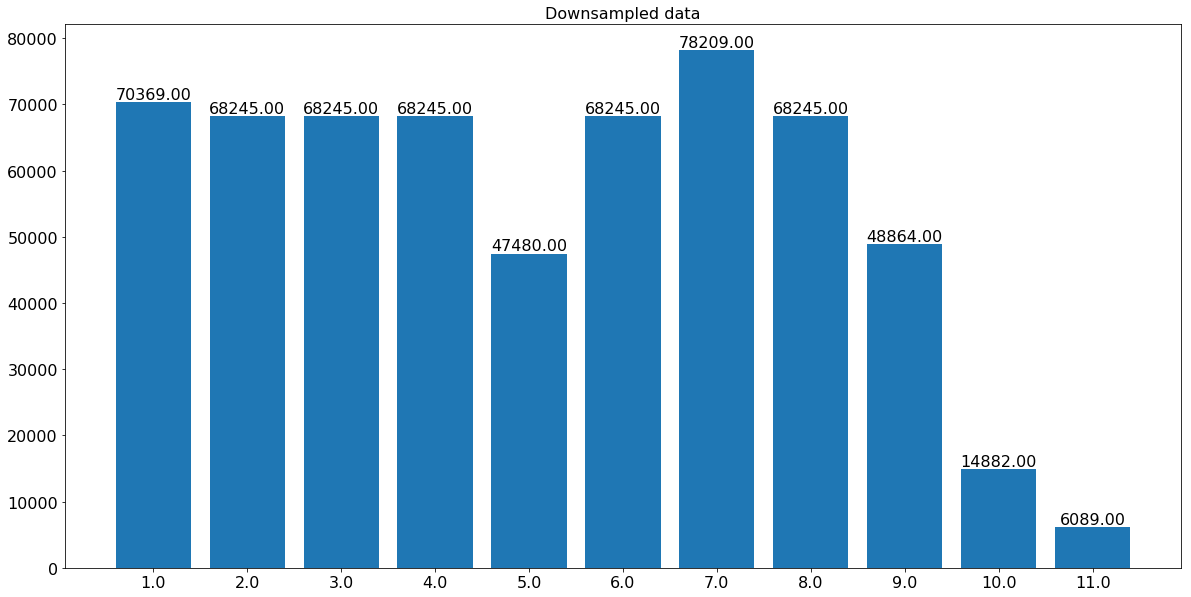

In [75]:
plot_count_mode(df_upsampled)

In [76]:
df_upsampled = up_othermode(df_upsampled, 10, 2)

In [77]:
df_upsampled = up_othermode(df_upsampled, 11, 2)

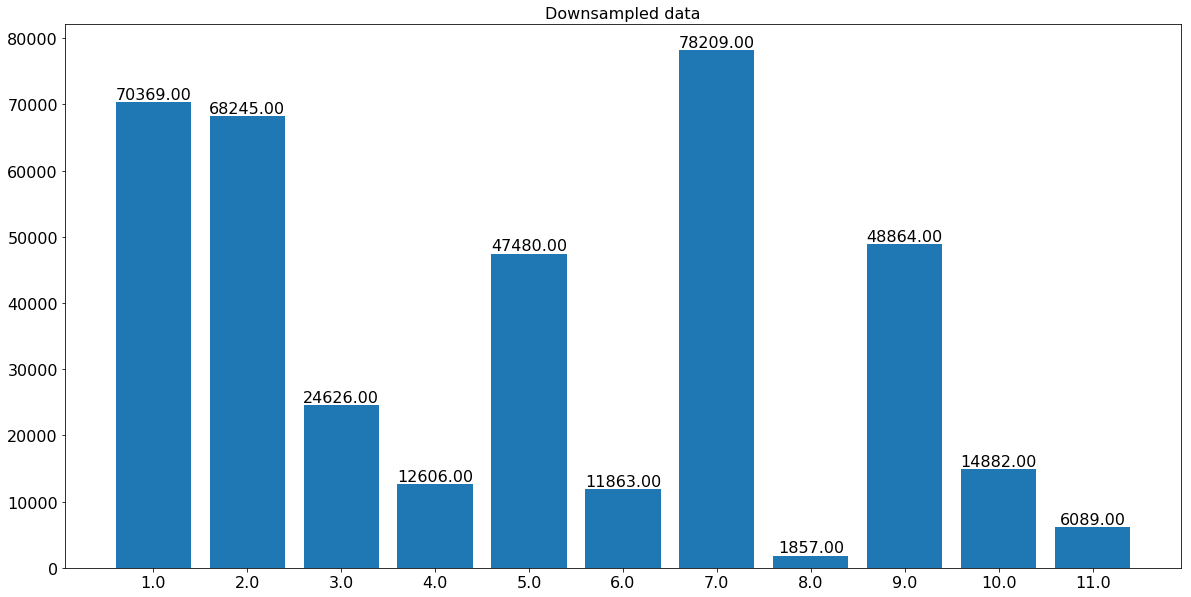

In [79]:
plot_count_mode(df)

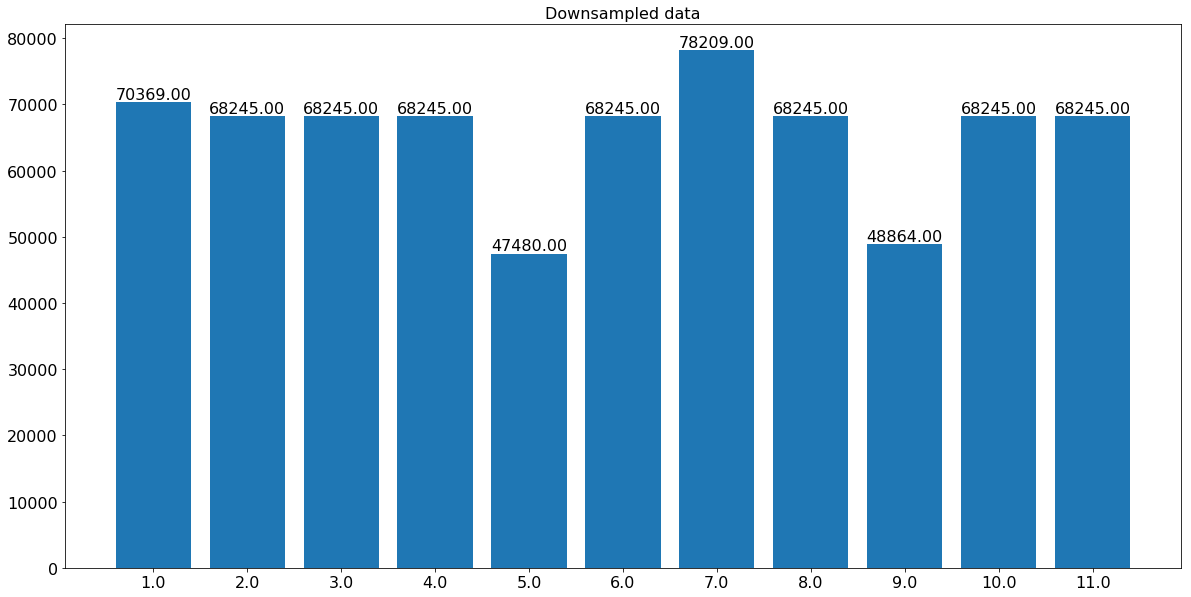

In [78]:
plot_count_mode(df_upsampled)

In [80]:
df_upsampled.to_pickle("../data/interim/df_upsampled_all.pickle")

In [48]:
# Example upsampling click_mode 8 to click_mode 11
df_upsampled = up_othermode(df, 8, 11)
df_upsampled.click_mode.count()

6089

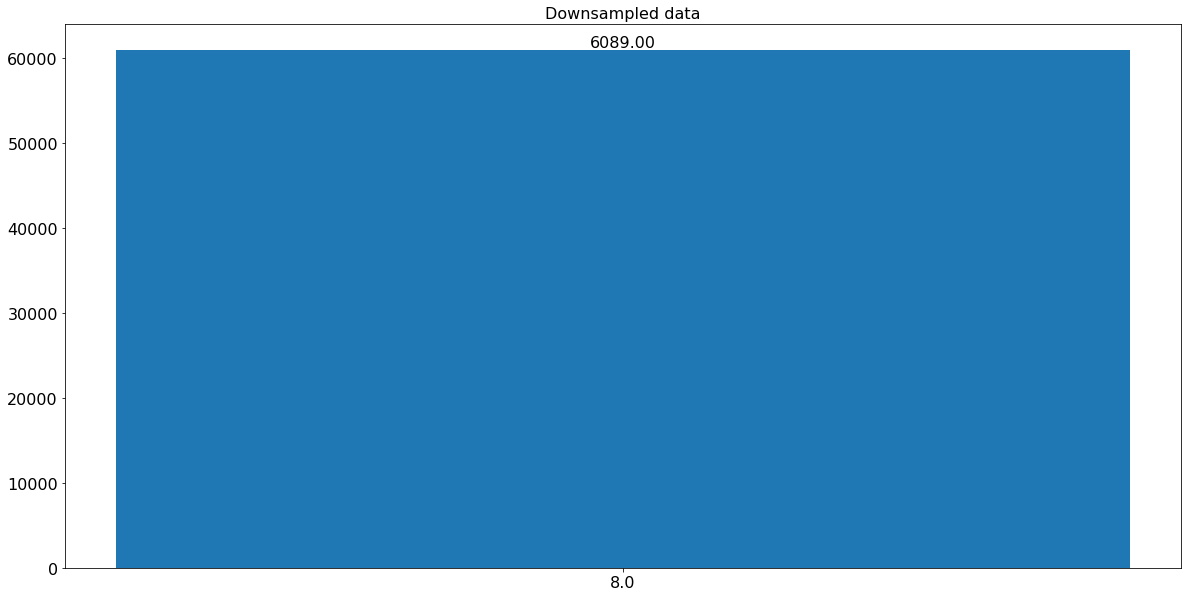

In [49]:
plot_count_mode(df_upsampled)

In [9]:
# Random upsampling 2x
# .sample() random items of given length; replace missing data with substituted values
# Returns list of upsampled mode 

def up_double(mode):
    quantity = click_mode_count(mode)
    double = quantity*2
    df_modelist = divide_mode(mode)
    
    df_mode_double = df_modelist.sample(double, replace=True)
    return df_mode_double

In [10]:
# Example upsampling click_mode 8 to double quantity
df_mode8_double = up_double(8)
df_mode8_double.click_mode.count()

3714

In [11]:
# Random upsampling with input percentage
# .sample() random items of given length; replace missing data with substituted values
# Returns list of upsampled mode 

def up_percent(mode, percentage):
    perc = percentage*0.01
    quantity = click_mode_count(mode) 
    quantity_to_add = int(quantity*perc)
    new_quantity = quantity + quantity_to_add
    df_modelist = divide_mode(mode)
    
    df_mode_perc = df_modelist.sample(new_quantity, replace=True)
    return df_mode_perc

In [12]:
# Example upsampling click_mode 8 by 40% (input)
df_mode8_40 = up_percent(8, 40)
df_mode8_40.click_mode.count()

2599

In [13]:
# Returns list without upsampled click_mode
def list_without_up_mode(up_mode):
    list_restmodes = []
    excerpt_mode = up_mode-1
    
    for mode in click_mode [:excerpt_mode]:
        click_mode_list = divide_mode(mode)
        list_restmodes.append(click_mode_list) 
    
    for mode in click_mode [(excerpt_mode+1):]:
        click_mode_list = divide_mode(mode)
        list_restmodes.append(click_mode_list) 
    
    df_restmodes = pd.concat(list_restmodes)
    return df_restmodes

In [14]:
# Example list without upsampled click_mode 8
liste_restmodes = list_without_up_mode(8)
liste_restmodes.click_mode.value_counts()

2.0     136491
7.0      78209
1.0      70369
9.0      48864
5.0      47480
3.0      24626
10.0     14882
4.0      12606
6.0      11863
11.0      6089
Name: click_mode, dtype: int64

In [15]:
# Returns list including upsampled click_mode
# Example upsample click_mode 8 to 40%

df_train_first_upsampled = pd.concat([up_percent(8, 40), list_without_up_mode(8)], axis=0)
df_train_first_upsampled.click_mode.value_counts()

2.0     136491
7.0      78209
1.0      70369
9.0      48864
5.0      47480
3.0      24626
10.0     14882
4.0      12606
6.0      11863
11.0      6089
8.0       2599
Name: click_mode, dtype: int64

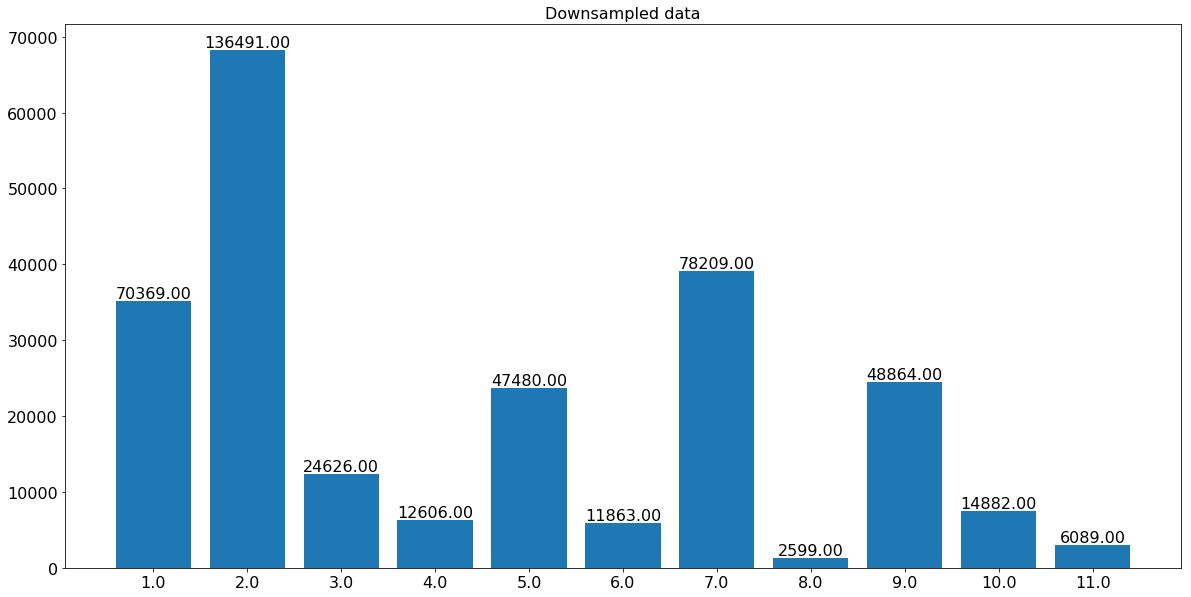

In [20]:
plot_count_mode(df_train_first_upsampled)

In [28]:
df_train_first_upsampled

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query,...,req_hour,req_weekend,req_night,req_day,req_evening,is_holiday,max_temp,min_temp,weather,wind
83722,8166.0,2018-11-10 20:00:20,8.0,NaN,2018-11-10 20:00:10,116.30,39.94,116.09,39.79,0.258070,...,20,1,0,0,1,0,11,0,dy,12
102995,2402561.0,2018-11-14 15:37:42,8.0,NaN,2018-11-14 15:37:13,116.34,39.88,116.68,39.92,0.342345,...,15,0,0,1,0,0,13,5,dy,12
196029,1313371.0,2018-11-06 22:23:26,8.0,136786.0,2018-11-06 22:23:20,116.11,40.24,116.22,39.95,0.310161,...,22,0,0,0,1,0,12,0,dy,12
364195,1545100.0,2018-11-28 06:32:36,8.0,102410.0,2018-11-28 06:32:14,116.36,39.97,116.43,39.91,0.092195,...,6,0,1,0,0,0,8,-3,q,1
128038,1103183.0,2018-11-08 07:23:40,8.0,NaN,2018-11-08 07:23:21,116.32,39.73,116.51,39.81,0.206155,...,7,0,1,0,0,0,14,2,dy,12
439276,1893099.0,2018-11-13 00:08:35,8.0,194514.0,2018-11-13 00:08:29,116.26,40.03,116.00,40.35,0.412311,...,0,0,1,0,0,0,13,5,dy,12
458271,2197660.0,2018-11-20 13:38:56,8.0,101209.0,2018-11-20 13:38:49,116.21,40.08,116.31,39.98,0.141421,...,13,0,0,1,0,0,9,-1,dy,12
398021,813857.0,2018-10-29 22:39:58,8.0,102769.0,2018-10-29 22:39:52,116.33,39.94,116.44,39.93,0.110454,...,22,0,0,0,1,0,15,3,q,34
301194,1549564.0,2018-11-28 09:21:21,8.0,214467.0,2018-11-28 09:20:59,116.44,39.95,116.00,40.35,0.594643,...,9,0,0,1,0,0,8,-3,q,1
357140,3106481.0,2018-10-26 06:35:10,8.0,137531.0,2018-10-26 06:34:36,116.39,40.17,116.43,39.98,0.194165,...,6,1,1,0,0,0,14,3,q,45


## Downsampled 2 upsample rest to two

In [46]:
df = pd.read_pickle("../data/interim/df_train_downsampled_2.pickle")

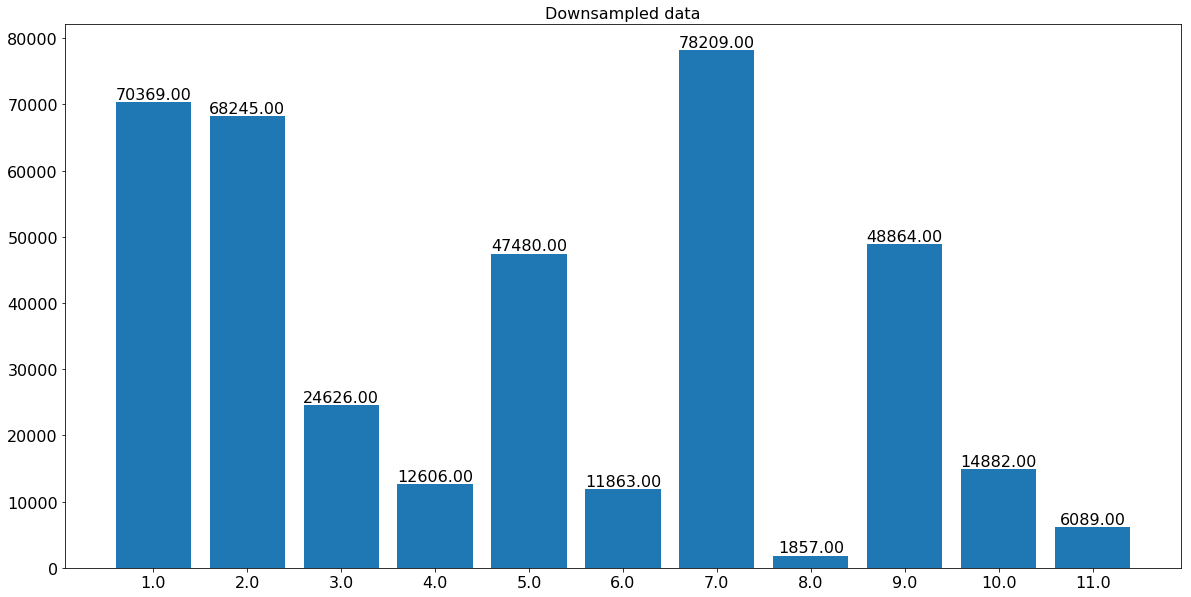

In [23]:
plot_count_mode(df)

In [25]:
up_othermode(8, 2)

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query,...,req_hour,req_weekend,req_night,req_day,req_evening,is_holiday,max_temp,min_temp,weather,wind
70777,3075240.0,2018-11-16 21:57:07,8.0,NaN,2018-11-16 21:56:48,116.62,39.90,116.53,39.75,0.174929,...,21,1,0,0,1,0,8,-1,q,12
377415,2455554.0,2018-11-30 12:06:47,8.0,162777.0,2018-11-30 12:06:44,116.39,39.89,116.01,40.35,0.596657,...,12,1,0,1,0,0,8,-3,q,1
340245,2467547.0,2018-11-30 20:08:50,8.0,128847.0,2018-11-30 20:08:17,116.26,40.10,116.33,39.90,0.211896,...,20,1,0,0,1,0,8,-3,q,1
123755,3151169.0,2018-10-26 13:25:38,8.0,NaN,2018-10-26 13:25:17,116.55,40.00,116.46,39.99,0.090554,...,13,1,0,1,0,0,14,3,q,45
13876,590276.0,2018-11-11 08:30:03,8.0,NaN,2018-11-11 08:29:52,116.55,40.07,116.00,40.35,0.617171,...,8,0,0,1,0,0,13,1,dyq,12
310973,1013744.0,2018-11-12 17:00:17,8.0,178755.0,2018-11-12 16:59:18,116.43,39.97,116.34,40.03,0.108167,...,16,0,0,1,0,0,14,2,q,12
52489,3167573.0,2018-11-21 09:49:46,8.0,NaN,2018-11-21 09:49:31,116.33,39.89,116.65,39.65,0.400000,...,9,0,0,1,0,0,9,-3,q,2
330974,2792806.0,2018-10-30 18:10:14,8.0,145280.0,2018-10-30 18:10:10,116.31,39.75,116.28,39.83,0.085440,...,18,0,0,0,0,0,16,1,q,12
358356,1486711.0,2018-10-27 22:05:23,8.0,169906.0,2018-10-27 22:05:13,116.40,39.98,116.25,40.04,0.161555,...,22,1,0,0,1,0,17,5,dy,12
494304,1499724.0,2018-10-27 12:35:32,8.0,137776.0,2018-10-27 12:35:19,116.20,40.19,116.59,40.08,0.405216,...,12,1,0,1,0,0,17,5,dy,12


In [26]:
def down_half(mode):
    quantity = click_mode_count(mode)
    print('Quantity: ', quantity)
    half = quantity//2
    print('Half: ', half)
    df_modelist = divide_mode(mode)
    
    df_mode_half = df_modelist.sample(half)
    return df_mode_half

In [28]:
df_down = down_half(2)

Quantity:  136491
Half:  68245


In [34]:
df_train_first_downsampled = pd.concat([down_half(2), list_without_up_mode(2)], axis=0)


Quantity:  136491
Half:  68245


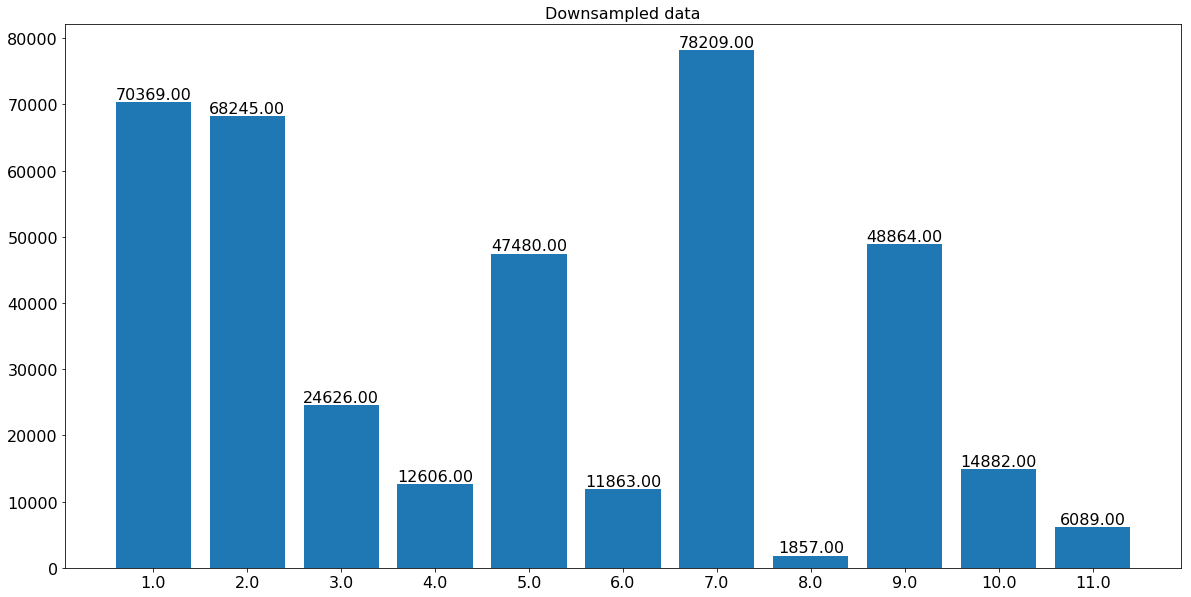

In [35]:
plot_count_mode(df_train_first_downsampled)